## Import the dataset


In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [147]:
df = pd.read_csv("data10-Copy1.csv")

In [148]:
df.drop('HowYouPrepare',axis = 1, inplace = True)
df.drop('Rate yourself',axis = 1, inplace = True)



In [149]:
df

,Gender,TravelMethod,TravelTime,PartTimeJob,Relationship,Father's_education,Mother's_education,StudyHours,AttendenceLecs,Concentrate,Friends,SocialMediaTime,extra curricular,StudyPattern,Marks
0,1,1,3,0,0,1,1,2,1,1,1,3,1,1,80 to 89
1,1,0,3,0,1,1,2,3,1,1,1,2,1,1,80 to 89
2,1,1,4,0,0,3,2,2,2,1,0,3,0,2,60 to 69
3,1,0,3,0,1,1,2,4,1,1,1,2,1,1,80 to 89
4,1,1,2,0,0,2,1,2,2,1,0,4,0,2,70 to 79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,0,0,1,0,0,1,2,1,2,1,1,3,0,2,90 to 100
374,1,1,4,1,1,1,2,4,2,1,1,1,1,1,90 to 100
375,1,1,3,0,0,2,2,3,2,1,1,2,1,1,90 to 100
376,1,0,1,1,1,2,2,2,1,1,1,2,1,1,90 to 100


In [150]:
df.shape

(378, 15)

In [151]:
df.count()

Gender                378
TravelMethod          378
TravelTime            378
PartTimeJob           378
Relationship          378
Father's_education    378
Mother's_education    378
StudyHours            378
AttendenceLecs        378
Concentrate           378
Friends               378
SocialMediaTime       378
extra curricular      378
StudyPattern          378
Marks                 378
dtype: int64

In [152]:
#No null values where discovered
df.isnull().sum()

Gender                0
TravelMethod          0
TravelTime            0
PartTimeJob           0
Relationship          0
Father's_education    0
Mother's_education    0
StudyHours            0
AttendenceLecs        0
Concentrate           0
Friends               0
SocialMediaTime       0
extra curricular      0
StudyPattern          0
Marks                 0
dtype: int64

## Visualization

In [153]:
df["Marks"].value_counts()

80 to 89     42
60 to 69     42
70 to 79     42
90 to 100    42
20 to 29     42
50 to 59     42
0 to 20      42
40 to 49     42
30 to 39     42
Name: Marks, dtype: int64

<AxesSubplot:>

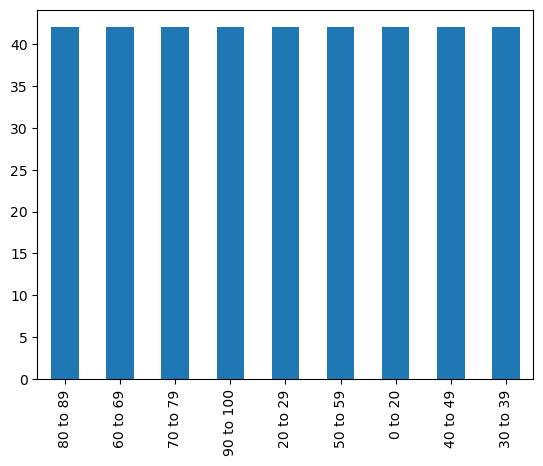

In [154]:
df["Marks"].value_counts().plot.bar()

In [155]:
df.iloc[:,0:].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gender,378.0,0.595238,0.491496,0.0,0.0,1.0,1.0,1.0
TravelMethod,378.0,0.544974,0.498633,0.0,0.0,1.0,1.0,1.0
TravelTime,378.0,2.883598,1.071549,1.0,2.0,3.0,4.0,4.0
PartTimeJob,378.0,0.431217,0.495903,0.0,0.0,0.0,1.0,1.0
Relationship,378.0,0.417989,0.493882,0.0,0.0,0.0,1.0,1.0
Father's_education,378.0,1.563492,0.593904,1.0,1.0,2.0,2.0,3.0
Mother's_education,378.0,1.798942,0.676862,1.0,1.0,2.0,2.0,3.0
StudyHours,378.0,2.272487,1.120030,1.0,1.0,2.0,3.0,5.0
AttendenceLecs,378.0,1.542328,0.573099,1.0,1.0,2.0,2.0,3.0
Concentrate,378.0,1.296296,0.561390,1.0,1.0,1.0,1.0,3.0


<AxesSubplot:>

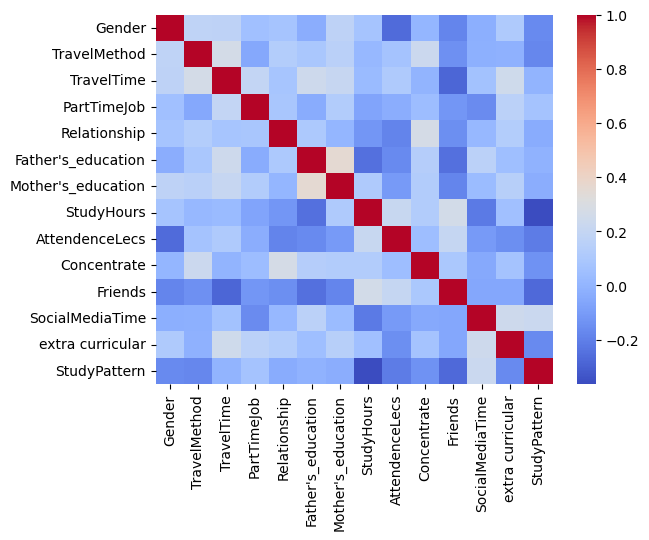

In [156]:
import seaborn as sns

sns.heatmap(df.corr(),cmap = 'coolwarm')

## Train/Test Split

In [157]:
X = df.drop("Marks",axis = 1)
y = df["Marks"]

In [158]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.3)

X_train.shape, X_test.shape

((264, 14), (114, 14))

In [159]:
from collections import Counter
print(Counter(y_train))


Counter({'30 to 39': 37, '70 to 79': 32, '80 to 89': 32, '20 to 29': 29, '50 to 59': 28, '90 to 100': 28, '40 to 49': 27, '60 to 69': 26, '0 to 20': 25})


## Decision Tree Classifier

In [160]:
from sklearn.tree import DecisionTreeClassifier

decisionModel = DecisionTreeClassifier()
decisionModel.fit(X_train,y_train)

decisionPred = decisionModel.predict(X_test)

decisionPred

array(['90 to 100', '40 to 49', '20 to 29', '0 to 20', '40 to 49',
       '50 to 59', '0 to 20', '80 to 89', '90 to 100', '40 to 49',
       '60 to 69', '20 to 29', '0 to 20', '20 to 29', '80 to 89',
       '80 to 89', '40 to 49', '70 to 79', '70 to 79', '40 to 49',
       '40 to 49', '20 to 29', '0 to 20', '60 to 69', '50 to 59',
       '60 to 69', '0 to 20', '20 to 29', '50 to 59', '80 to 89',
       '0 to 20', '40 to 49', '50 to 59', '50 to 59', '0 to 20',
       '40 to 49', '0 to 20', '30 to 39', '50 to 59', '20 to 29',
       '30 to 39', '50 to 59', '90 to 100', '40 to 49', '20 to 29',
       '50 to 59', '80 to 89', '90 to 100', '70 to 79', '90 to 100',
       '30 to 39', '0 to 20', '50 to 59', '60 to 69', '20 to 29',
       '90 to 100', '0 to 20', '40 to 49', '0 to 20', '30 to 39',
       '90 to 100', '30 to 39', '20 to 29', '80 to 89', '90 to 100',
       '90 to 100', '70 to 79', '50 to 59', '90 to 100', '80 to 89',
       '70 to 79', '50 to 59', '80 to 89', '50 to 59', '80 to 8

In [161]:
#Accuracy of decision tree model
accuracy_score(y_test,decisionPred)

0.8157894736842105

In [162]:
pd.crosstab(y_test,decisionPred)

col_0,0 to 20,20 to 29,30 to 39,40 to 49,50 to 59,60 to 69,70 to 79,80 to 89,90 to 100
Marks,,,,,,,,,
0 to 20,17,0,0,0,0,0,0,0,0
20 to 29,0,13,0,0,0,0,0,0,0
30 to 39,0,0,5,0,0,0,0,0,0
40 to 49,0,0,0,15,0,0,0,0,0
50 to 59,0,0,0,0,14,0,0,0,0
60 to 69,2,0,1,0,1,6,1,5,0
70 to 79,0,0,1,0,0,2,4,3,0
80 to 89,0,1,0,0,0,0,3,5,1
90 to 100,0,0,0,0,0,0,0,0,14


## Random Forest Classifier

In [163]:
from sklearn.ensemble import RandomForestClassifier

randForestModel = RandomForestClassifier()
randForestModel.fit(X_train, y_train)

randForestPred = randForestModel.predict(X_test)
randForestPred

array(['90 to 100', '40 to 49', '20 to 29', '0 to 20', '40 to 49',
       '50 to 59', '0 to 20', '80 to 89', '90 to 100', '40 to 49',
       '60 to 69', '20 to 29', '70 to 79', '20 to 29', '80 to 89',
       '80 to 89', '40 to 49', '90 to 100', '70 to 79', '40 to 49',
       '40 to 49', '20 to 29', '70 to 79', '60 to 69', '50 to 59',
       '60 to 69', '0 to 20', '20 to 29', '50 to 59', '80 to 89',
       '0 to 20', '40 to 49', '50 to 59', '50 to 59', '0 to 20',
       '40 to 49', '0 to 20', '30 to 39', '50 to 59', '20 to 29',
       '30 to 39', '50 to 59', '90 to 100', '40 to 49', '20 to 29',
       '50 to 59', '70 to 79', '90 to 100', '70 to 79', '90 to 100',
       '30 to 39', '0 to 20', '50 to 59', '60 to 69', '20 to 29',
       '90 to 100', '0 to 20', '40 to 49', '0 to 20', '70 to 79',
       '90 to 100', '30 to 39', '20 to 29', '80 to 89', '90 to 100',
       '90 to 100', '70 to 79', '50 to 59', '90 to 100', '80 to 89',
       '70 to 79', '50 to 59', '70 to 79', '50 to 59', '80 t

In [164]:
#Accuracy of random forest model
accuracy_score(y_test,randForestPred)

0.8157894736842105

In [165]:
pd.crosstab(y_test,randForestPred)

col_0,0 to 20,20 to 29,30 to 39,40 to 49,50 to 59,60 to 69,70 to 79,80 to 89,90 to 100
Marks,,,,,,,,,
0 to 20,17,0,0,0,0,0,0,0,0
20 to 29,0,13,0,0,0,0,0,0,0
30 to 39,0,0,5,0,0,0,0,0,0
40 to 49,0,0,0,15,0,0,0,0,0
50 to 59,0,0,0,0,14,0,0,0,0
60 to 69,0,0,1,0,1,6,4,4,0
70 to 79,0,0,0,0,0,0,4,5,1
80 to 89,0,0,0,0,0,0,4,5,1
90 to 100,0,0,0,0,0,0,0,0,14


## Support vector machine Classifier

In [166]:
from sklearn import svm

svm_model= svm.SVC(decision_function_shape='ovo')
svm_model.fit(X_train, y_train)

svm_pred = svm_model.predict(X_test)
svm_pred

array(['90 to 100', '40 to 49', '20 to 29', '0 to 20', '40 to 49',
       '80 to 89', '0 to 20', '70 to 79', '70 to 79', '40 to 49',
       '80 to 89', '20 to 29', '40 to 49', '20 to 29', '80 to 89',
       '80 to 89', '40 to 49', '70 to 79', '90 to 100', '40 to 49',
       '40 to 49', '40 to 49', '40 to 49', '70 to 79', '80 to 89',
       '80 to 89', '0 to 20', '20 to 29', '50 to 59', '80 to 89',
       '0 to 20', '40 to 49', '50 to 59', '50 to 59', '0 to 20',
       '40 to 49', '0 to 20', '30 to 39', '80 to 89', '20 to 29',
       '0 to 20', '50 to 59', '70 to 79', '40 to 49', '20 to 29',
       '70 to 79', '70 to 79', '90 to 100', '40 to 49', '70 to 79',
       '30 to 39', '0 to 20', '50 to 59', '80 to 89', '40 to 49',
       '90 to 100', '0 to 20', '40 to 49', '0 to 20', '50 to 59',
       '90 to 100', '30 to 39', '20 to 29', '80 to 89', '70 to 79',
       '70 to 79', '40 to 49', '50 to 59', '90 to 100', '80 to 89',
       '70 to 79', '50 to 59', '30 to 39', '80 to 89', '60 to 69',

In [167]:
accuracy_score(y_test,svm_pred)

0.5964912280701754

In [168]:
pd.crosstab(y_test,svm_pred)

col_0,0 to 20,20 to 29,30 to 39,40 to 49,50 to 59,60 to 69,70 to 79,80 to 89,90 to 100
Marks,,,,,,,,,
0 to 20,17,0,0,0,0,0,0,0,0
20 to 29,0,8,0,3,0,0,2,0,0
30 to 39,1,0,4,0,0,0,0,0,0
40 to 49,0,0,0,14,0,0,1,0,0
50 to 59,0,0,0,0,10,0,0,4,0
60 to 69,0,0,1,2,1,2,5,5,0
70 to 79,0,0,0,2,1,0,1,6,0
80 to 89,0,0,0,0,0,0,4,3,3
90 to 100,0,0,0,0,0,0,5,0,9


In [169]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


estimators_list = [('model1',decisionModel),('model2',randForestModel),('model3',svm_model)]

pipe = make_pipeline(StandardScaler(), StackingClassifier(estimators = estimators_list, final_estimator = LogisticRegression(max_iter=2000)))
                     
pipe.fit(X_train, y_train)

stackPred = pipe.predict(X_test)

stackPred


array(['90 to 100', '40 to 49', '20 to 29', '0 to 20', '40 to 49',
       '50 to 59', '0 to 20', '80 to 89', '90 to 100', '40 to 49',
       '60 to 69', '20 to 29', '70 to 79', '20 to 29', '70 to 79',
       '80 to 89', '40 to 49', '70 to 79', '70 to 79', '40 to 49',
       '40 to 49', '20 to 29', '70 to 79', '60 to 69', '50 to 59',
       '60 to 69', '0 to 20', '20 to 29', '50 to 59', '80 to 89',
       '0 to 20', '40 to 49', '50 to 59', '50 to 59', '0 to 20',
       '40 to 49', '0 to 20', '30 to 39', '50 to 59', '20 to 29',
       '30 to 39', '50 to 59', '90 to 100', '40 to 49', '20 to 29',
       '50 to 59', '70 to 79', '90 to 100', '70 to 79', '90 to 100',
       '30 to 39', '0 to 20', '50 to 59', '60 to 69', '20 to 29',
       '90 to 100', '0 to 20', '40 to 49', '0 to 20', '50 to 59',
       '90 to 100', '30 to 39', '20 to 29', '80 to 89', '90 to 100',
       '90 to 100', '70 to 79', '50 to 59', '90 to 100', '80 to 89',
       '70 to 79', '50 to 59', '70 to 79', '50 to 59', '70 to

In [170]:
accuracy_score(y_test,stackPred)

0.8157894736842105

In [171]:
pd.crosstab(y_test,stackPred)

col_0,0 to 20,20 to 29,30 to 39,40 to 49,50 to 59,60 to 69,70 to 79,80 to 89,90 to 100
Marks,,,,,,,,,
0 to 20,17,0,0,0,0,0,0,0,0
20 to 29,0,13,0,0,0,0,0,0,0
30 to 39,0,0,5,0,0,0,0,0,0
40 to 49,0,0,0,14,0,0,1,0,0
50 to 59,0,0,0,0,14,0,0,0,0
60 to 69,0,0,0,0,1,6,6,3,0
70 to 79,0,0,0,0,1,0,7,2,0
80 to 89,0,0,0,0,0,0,6,3,1
90 to 100,0,0,0,0,0,0,0,0,14


In [172]:
from sklearn.metrics import classification_report

print(classification_report(y_test,stackPred))

              precision    recall  f1-score   support

     0 to 20       1.00      1.00      1.00        17
    20 to 29       1.00      1.00      1.00        13
    30 to 39       1.00      1.00      1.00         5
    40 to 49       1.00      0.93      0.97        15
    50 to 59       0.88      1.00      0.93        14
    60 to 69       1.00      0.38      0.55        16
    70 to 79       0.35      0.70      0.47        10
    80 to 89       0.38      0.30      0.33        10
   90 to 100       0.93      1.00      0.97        14

    accuracy                           0.82       114
   macro avg       0.84      0.81      0.80       114
weighted avg       0.86      0.82      0.81       114



## Cross Validation

In [173]:
from sklearn.model_selection import StratifiedKFold
#10 folds
kf = StratifiedKFold(n_splits= 10)
kf

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

In [174]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test,y_test)

In [175]:
scores_model = []

X = df.drop("Marks",axis = 1)
y = df["Marks"]


for train_index, test_index in kf.split(X,y):
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.loc[test_index]
    scores_model.append(get_score(pipe, X_train, X_test, y_train, y_test))


In [176]:
scores_model

[0.8157894736842105,
 0.6578947368421053,
 0.8157894736842105,
 0.7631578947368421,
 0.7105263157894737,
 0.9210526315789473,
 0.9210526315789473,
 0.8947368421052632,
 0.8378378378378378,
 0.8648648648648649]